EPSG:32736
418322.75390625 418479.00390625
6823687.744140625 6823843.994140625


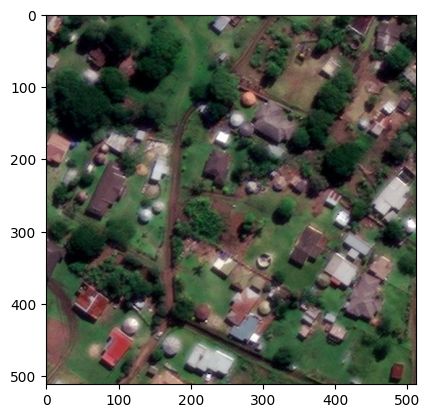

In [8]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box

# Path to your RGB TIFF file
#file_path = '/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Emilia-Romagna-Italy-flooding-may23/pre/10300500DDF89E00/031111210233.tif'

NAME = 'SouthAfrica_11400_4300'
FILE = '/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/southafrica-flooding22/pre/105001002B1CF100/213113323133.tif'
PSEUDO_LBL = '/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/southafrica-flooding22/pre/105001002B1CF100/213113323133.tif'
INFERENCE = '/nfs/projects/overwatch/maxar-segmentation/inferences/mic_sampler_512_30000/southafrica-flooding22/pre/105001002B1CF100/213113323133.tif'
WIDTH = HEIGHT = 512

#for path in [FILE, PSEUDO_LBL, INFERENCE]:

with rasterio.open(FILE) as src:
    window = rasterio.windows.Window(col_off=11400, row_off=4300, width=WIDTH, height=HEIGHT)
    data = src.read(window=window)
    profile = src.profile
    transform = src.transform
    minx, miny = src.window_transform(window)  * (0, HEIGHT)
    maxx, maxy = src.window_transform(window)  * (WIDTH, 0)
    print(src.crs)

print(minx, maxx)
print(miny, maxy)
query_box = box(minx, miny, maxx, maxy)

# Plot the image
plt.imshow(data.transpose(1, 2, 0))
plt.show()

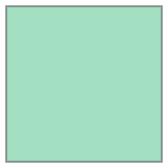

In [2]:
query_box

In [ ]:
profile.update({
'width': WIDTH,
'height': HEIGHT,
'transform': src.window_transform(window)  # Update the transform for the new window
})

output_file_path = f'SouthAfrica_{WIDTH}x{HEIGHT}_inference.tif'
# Write the data to a new TIFF file
with rasterio.open(output_file_path, 'w', **profile) as dst:
    dst.write(data)

In [3]:
import pandas as pd
import geopandas as gpd
from shapely import wkt, wkb

# Path to the Parquet file
parquet_file = '/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/southafrica-flooding22/pre/105001002B1CF100/213113323133.parquet'

# Read the Parquet file
df = pd.read_parquet(parquet_file, engine='pyarrow')

# Assuming the geometry is stored in a column named 'geometry' as WKT
df['geometry'] = df['geometry'].apply(wkb.loads)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')


In [4]:
gdf

,geometry,class_id,component
0,"POLYGON ((419455.542 6825116.593, 419455.303 6...",0,NaN
1,"POLYGON ((418554.719 6823906.953, 418554.767 6...",0,NaN
2,"POLYGON ((417141.045 6824964.603, 417160.886 6...",0,NaN
3,"POLYGON ((418931.391 6822718.224, 418931.710 6...",0,NaN
4,"POLYGON ((416944.366 6822572.210, 417023.221 6...",0,NaN
...,...,...,...
16832,"POLYGON ((418150.635 6825152.893, 418150.024 6...",2,0.0
16833,"POLYGON ((418079.224 6825154.114, 418079.224 6...",2,0.0
16834,"POLYGON ((419805.298 6825156.250, 419805.298 6...",2,0.0
16835,"POLYGON ((419120.483 6825155.945, 419120.483 6...",2,0.0


In [7]:
gdf[gdf.geometry.intersects(query_box)].to_file("output_file.geojson", driver='GeoJSON')

In [7]:
profile.update({
    'width': WIDTH,
    'height': HEIGHT,
    'transform': src.window_transform(window)  # Update the transform for the new window
})

output_file_path = f'SouthAfrica_{WIDTH}x{HEIGHT}_pseudo_lbl.tif'
# Write the data to a new TIFF file
with rasterio.open(output_file_path, 'w', **profile) as dst:
    dst.write(data)

TypeError: Invalid shape (3, 1024, 1024) for image data

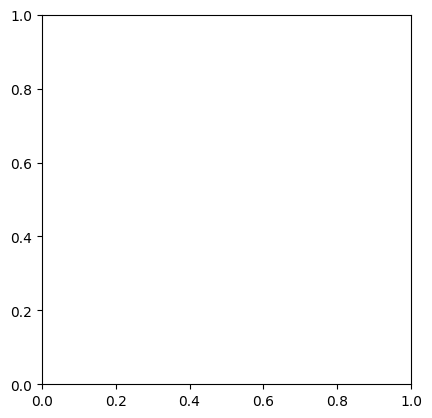

In [8]:
import rasterio
import matplotlib.pyplot as plt

# Path to your TIFF file
file_path = '/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Emilia-Romagna-Italy-flooding-may23/pre/10300500DDF89E00/031111210233.tif'

# Open the TIFF file
with rasterio.open(file_path) as src:
    # If the image is larger, adjust the window to read only a 1024x1024 block
    if src.width > 1024 or src.height > 1024:
        window = rasterio.windows.Window(col_off=8000, row_off=8000, width=1024, height=1024)
        data = src.read(window=window)
    else:
        data = src.read()

    # Assuming the data is in the first band
    

# Plot the image
plt.imshow(data.)  # Use grayscale color map or choose appropriate
plt.title('1024x1024 TIFF Image')
plt.xlabel('Pixel X Coordinates')
plt.ylabel('Pixel Y Coordinates')
plt.colorbar(label='Pixel values')
plt.show()

In [1]:
import os
os.chdir('/nfs/home/vaschetti/maxarSrc/')
from maxarseg.assemble import names
import pandas as pd
import numpy as np

In [2]:
global_df = pd.read_csv('/nfs/home/vaschetti/maxarSrc/stats/glbl_lbl_stats.csv', index_col=0)

In [8]:
global_df['event'].nunique()

19

In [3]:
len(global_df)

6896

In [5]:
global_df[['num_ms_build_aoi_no_water_for', 'parquet_build', 'parquet_tree' ]].sum()

num_ms_build_aoi_no_water_for     7868086
parquet_build                     7737401
parquet_tree                     15104779
dtype: int64

In [6]:
7737401 + 15104779 + 2574324

25416504

In [7]:
25416504/1000_000

25.416504

In [4]:
global_df.head(1)

,local_ix,event,mosaic,tile,num_ms_build_aoi,num_ms_build_aoi_no_water_for,num_ms_build_aoi_no_water_sjoin,parquet_build,parquet_tree,bg_pxl,road_pxl,tree_pxl,build_pxl,entropy
0,0,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111330333.tif,31,31,31,32,56,0.999552,0.0,0.000376,0.000072,0.005911


In [18]:
k = 1
global_df.groupby('event')['entropy'].nlargest(k).sort_values(ascending=False)
#.reset_index(level=1, drop=True)

event                                    
Hurricane-Ian-9-26-2022              929     1.832519
Gambia-flooding-8-11-2022            298     1.735995
Kahramanmaras-turkey-earthquake-23   2846    1.668272
Morocco-Earthquake-Sept-2023         4454    1.622858
Hurricane-Fiona-9-19-2022            329     1.570174
Emilia-Romagna-Italy-flooding-may23  235     1.396717
Indonesia-Earthquake22               2823    1.266820
Sudan-flooding-8-22-2022             5652    1.218960
pakistan-flooding22                  6596    1.171690
southafrica-flooding22               6888    1.061178
BayofBengal-Cyclone-Mocha-May-23     147     0.797545
Hurricane-Idalia-Florida-Aug23       2271    0.700060
NWT-Canada-Aug-23                    5631    0.518734
kentucky-flooding-7-29-2022          6304    0.480284
India-Floods-Oct-2023                2764    0.456029
cyclone-emnati22                     6266    0.445037
afghanistan-earthquake22             5753    0.439453
Kalehe-DRC-Flooding-5-8-23           306

In [20]:
global_df.iloc[235]

local_ix                                                            61
event                              Emilia-Romagna-Italy-flooding-may23
mosaic                                                10300500DDF89E00
tile                                                  031111210233.tif
num_ms_build_aoi                                                 10215
num_ms_build_aoi_no_water_for                                    10215
num_ms_build_aoi_no_water_sjoin                                  10215
parquet_build                                                    12663
parquet_tree                                                     10036
bg_pxl                                                        0.672261
road_pxl                                                      0.101424
tree_pxl                                                      0.061917
build_pxl                                                     0.164397
entropy                                                       1.396717
Name: 

In [5]:
global_df.sort_values(by = 'entropy', ascending=False)

,local_ix,event,mosaic,tile,num_ms_build_aoi,num_ms_build_aoi_no_water_for,num_ms_build_aoi_no_water_sjoin,parquet_build,parquet_tree,bg_pxl,road_pxl,tree_pxl,build_pxl,entropy
929,509,Hurricane-Ian-9-26-2022,10300100D1553D00,031331033112.tif,21093,21093,21093,23597,28572,0.462853,0.158918,0.229205,0.149023,1.832519
927,507,Hurricane-Ian-9-26-2022,10300100D1553D00,031331033110.tif,21557,21557,21557,24239,27222,0.474140,0.133288,0.215182,0.177390,1.817497
653,233,Hurricane-Ian-9-26-2022,10300100D01AC700,031331033112.tif,21093,21093,21093,21923,22234,0.494926,0.163110,0.185901,0.156063,1.798390
651,231,Hurricane-Ian-9-26-2022,10300100D01AC700,031331033110.tif,21557,21557,21557,22663,21496,0.501557,0.136106,0.179238,0.183099,1.783895
969,549,Hurricane-Ian-9-26-2022,10300100D665FE00,031331120212.tif,17497,17497,17497,18417,17607,0.526377,0.155223,0.139423,0.178976,1.745065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,104,Hurricane-Ian-9-26-2022,10300100CCC6CD00,033111002113.tif,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
6467,57,pakistan-flooding22,10300100CFA70700,031333033122.tif,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
32,32,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033113111010.tif,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
72,72,BayofBengal-Cyclone-Mocha-May-23,10300110E84B5A00,033113111012.tif,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
global_df.head(1)

,local_ix,event,mosaic,tile,num_ms_build_aoi,num_ms_build_aoi_no_water_for,num_ms_build_aoi_no_water_sjoin,parquet_build,parquet_tree,bg_pxl,road_pxl,tree_pxl,build_pxl,entropy
0,0,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111330333.tif,31,31,31,32,56,0.999552,0.0,0.000376,0.000072,0.005911


In [9]:
global_df[['num_ms_build_aoi','num_ms_build_aoi_no_water_for','num_ms_build_aoi_no_water_sjoin','parquet_build', 'parquet_tree']].sum()

num_ms_build_aoi                    8057828
num_ms_build_aoi_no_water_for       7868086
num_ms_build_aoi_no_water_sjoin     7868086
parquet_build                       7737401
parquet_tree                       15104779
dtype: int64

In [25]:
pd.read_csv('/nfs/home/vaschetti/maxarSrc/stats/road_stats/road_stats_per_tile.csv', index_col=0).mt_2.sum()

2574324

In [26]:
15_104_779 + 7_868_086 + 2_574_324 = 25_547_189

25547189

In [4]:
global_df['event'].unique()

array(['BayofBengal-Cyclone-Mocha-May-23',
       'Emilia-Romagna-Italy-flooding-may23', 'Gambia-flooding-8-11-2022',
       'Hurricane-Fiona-9-19-2022', 'Hurricane-Ian-9-26-2022',
       'Hurricane-Idalia-Florida-Aug23', 'India-Floods-Oct-2023',
       'Indonesia-Earthquake22', 'Kahramanmaras-turkey-earthquake-23',
       'Kalehe-DRC-Flooding-5-8-23', 'Morocco-Earthquake-Sept-2023',
       'NWT-Canada-Aug-23', 'Sudan-flooding-8-22-2022',
       'afghanistan-earthquake22', 'cyclone-emnati22',
       'kentucky-flooding-7-29-2022', 'pakistan-flooding22',
       'shovi-georgia-landslide-8Aug23', 'southafrica-flooding22'],
      dtype=object)

In [23]:
ev_name = 'southafrica-flooding22'

In [24]:
partial_df = global_df[global_df['event'] == ev_name].sort_values(by='entropy', ascending=False)

In [25]:
partial_df.head()

,local_ix,event,mosaic,tile,num_ms_build_aoi,num_ms_build_aoi_no_water_for,num_ms_build_aoi_no_water_sjoin,parquet_build,parquet_tree,bg_pxl,road_pxl,tree_pxl,build_pxl,entropy
6888,29,southafrica-flooding22,105001002B1CF200,213113323210.tif,10172,10108,10108,9547,12644,0.790449,0.046591,0.093552,0.069408,1.061178
6868,9,southafrica-flooding22,105001002B1CF100,213113323301.tif,5497,5497,5497,5564,7847,0.825003,0.052459,0.050218,0.072320,0.942829
6892,33,southafrica-flooding22,105001002B1CF200,213113323300.tif,1554,1554,1554,2140,10990,0.876258,0.028086,0.062250,0.033407,0.724923
6871,12,southafrica-flooding22,105001002B1CF100,213113323310.tif,6834,6833,6833,6145,5879,0.879830,0.029423,0.049560,0.041187,0.716534
6866,7,southafrica-flooding22,105001002B1CF100,213113323133.tif,8295,8295,8295,7808,8429,0.898149,0.027993,0.049896,0.023962,0.628385


In [7]:
glbl_df_loaded['parquet_build'].sum()

7737401

In [8]:
glbl_df_loaded['parquet_tree'].sum()

15104779

In [9]:
glbl_df_loaded['parquet_build'].sum() + glbl_df_loaded['parquet_tree'].sum()

22842180

In [ ]:
glbl_df_loaded['parquet_tree'].sum()

In [10]:
glbl_df_loaded['whole_name'].nunique()

6896

In [8]:
glbl_df_loaded['whole_name'] = glbl_df_loaded['event'] + '_' + glbl_df_loaded['mosaic'] + '_' + glbl_df_loaded['tile']

In [5]:
glbl_df_loaded[['bg_pxl', 'road_pxl','tree_pxl', 'build_pxl' ]].mean()

bg_pxl       0.964458
road_pxl     0.013446
tree_pxl     0.011841
build_pxl    0.010255
dtype: float64

In [2]:
entro = np.load('/nfs/home/vaschetti/maxarSrc/stats/glbl_high_res_entropies.npy')
entro.shape

(6896, 17, 17)

In [3]:
import json
with open('/nfs/home/vaschetti/maxarSrc/index_map.json') as f:
    index_map = json.load(f)

In [9]:
entro[index_map['shovi-georgia-landslide-8Aug23/pre/105001000A76A200/031113103233.tif'], 5, 3]

0.043682017111775724

In [10]:
0.043682017111775724 == 0.043682017111775724

True

In [14]:
glbl_df_loaded = pd.read_csv('/nfs/home/vaschetti/maxarSrc/stats/glbl_lbl_stats.csv', index_col=0)

In [15]:
glbl_df_loaded.head(1)

,local_ix,event,mosaic,tile,num_ms_build_aoi,num_ms_build_aoi_no_water_for,num_ms_build_aoi_no_water_sjoin,parquet_build,parquet_tree,bg_pxl,road_pxl,tree_pxl,build_pxl,entropy
0,0,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111330333.tif,31,31,31,32,56,0.999552,0.0,0.000376,0.000072,0.005911


In [16]:
glbl_df_loaded[['bg_pxl', 'road_pxl','tree_pxl', 'build_pxl' ]].mean()

bg_pxl       0.964458
road_pxl     0.013446
tree_pxl     0.011841
build_pxl    0.010255
dtype: float64

In [4]:
glbl_df_loaded.head(1)

,local_ix,event,mosaic,tile,num_ms_build_aoi,num_ms_build_aoi_no_water_for,num_ms_build_aoi_no_water_sjoin,parquet_build,parquet_tree,bg_pxl,road_pxl,tree_pxl,build_pxl,entropy
0,0,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111330333.tif,31,31,31,32,56,0.999552,0.0,0.000376,0.000072,0.005911


In [8]:
index_map = {}
for i, row in glbl_df_loaded.iterrows():
    file_name = row['event']+'/pre/'+row['mosaic']+'/'+row['tile']
    index_map[file_name] = i

In [49]:
import random
ix = random.randint(0, len(index_map))
for ix in range(len(index_map)):
    #print(ix, '\n')
    row = glbl_df_loaded.iloc[ix]
    #print(row['event'], row['mosaic'], row['tile'], '\n')
    file_name = row['event']+'/pre/'+row['mosaic']+'/'+row['tile']
    #print(file_name, '\n')
    if ix != index_map[file_name]:
        print('Errore')

In [9]:
"""import json
with open('index_map.json', 'w') as f:
    json.dump(index_map, f, indent=4)"""

In [2]:
ev_names = names.get_all_events()
root = '/nfs/home/vaschetti/maxarSrc/stats/'
i = 0
dfs = []
npys = []
for name in sorted(ev_names):
    df_path = os.path.join(root, name + '_lbl_stats.csv')
    npy_path = os.path.join(root, name + '_high_res_entropies.npy')
    if os.path.exists(df_path):
        dfs.append(pd.read_csv(df_path))
        npys.append(np.load(npy_path))
        print(name)

global_df = pd.concat(dfs, ignore_index=True)
global_entropies = np.concatenate(npys, axis = 0)

BayofBengal-Cyclone-Mocha-May-23
Emilia-Romagna-Italy-flooding-may23
Gambia-flooding-8-11-2022
Hurricane-Fiona-9-19-2022
Hurricane-Ian-9-26-2022
Hurricane-Idalia-Florida-Aug23
India-Floods-Oct-2023
Indonesia-Earthquake22
Kahramanmaras-turkey-earthquake-23
Kalehe-DRC-Flooding-5-8-23
Morocco-Earthquake-Sept-2023
NWT-Canada-Aug-23
Sudan-flooding-8-22-2022
afghanistan-earthquake22
cyclone-emnati22
kentucky-flooding-7-29-2022
pakistan-flooding22
shovi-georgia-landslide-8Aug23
southafrica-flooding22


In [48]:
global_entropies.shape

(6896, 17, 17)

In [51]:
global_entropies_loaded = np.load('/nfs/home/vaschetti/maxarSrc/stats/glbl_high_res_entropies.npy')

In [53]:
(global_entropies == global_entropies_loaded).all()

True

In [8]:
global_df

,local_ix,event,mosaic,tile,num_ms_build_aoi,num_ms_build_aoi_no_water_for,num_ms_build_aoi_no_water_sjoin,parquet_build,parquet_tree,bg_pxl,road_pxl,tree_pxl,build_pxl,entropy
0,0,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111330333.tif,31,31,31,32,56,0.999552,0.000000,0.000376,0.000072,0.005911
1,1,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111331222.tif,41,39,39,43,38,0.999169,0.000490,0.000256,0.000085,0.010787
2,2,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111331223.tif,238,237,237,236,43,0.998949,0.000100,0.000360,0.000590,0.013296
3,3,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111331232.tif,53,53,53,58,29,0.999582,0.000035,0.000246,0.000138,0.005834
4,4,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111332111.tif,65,65,65,70,38,0.999473,0.000000,0.000375,0.000151,0.006950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,32,southafrica-flooding22,105001002B1CF200,213113323213.tif,197,153,153,152,1236,0.978187,0.012593,0.008515,0.000705,0.176528
6892,33,southafrica-flooding22,105001002B1CF200,213113323300.tif,1554,1554,1554,2140,10990,0.876258,0.028086,0.062250,0.033407,0.724923
6893,34,southafrica-flooding22,105001002B1CF200,213113323301.tif,870,868,868,1326,2540,0.949807,0.013115,0.013137,0.023942,0.363587
6894,35,southafrica-flooding22,105001002B1CF200,213113323302.tif,124,124,124,166,2240,0.977122,0.006372,0.014201,0.002305,0.186460


In [16]:
glbl_df_loaded

,local_ix,event,mosaic,tile,num_ms_build_aoi,num_ms_build_aoi_no_water_for,num_ms_build_aoi_no_water_sjoin,parquet_build,parquet_tree,bg_pxl,road_pxl,tree_pxl,build_pxl,entropy
0,0,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111330333.tif,31,31,31,32,56,0.999552,0.000000,0.000376,0.000072,0.005911
1,1,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111331222.tif,41,39,39,43,38,0.999169,0.000490,0.000256,0.000085,0.010787
2,2,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111331223.tif,238,237,237,236,43,0.998949,0.000100,0.000360,0.000590,0.013296
3,3,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111331232.tif,53,53,53,58,29,0.999582,0.000035,0.000246,0.000138,0.005834
4,4,BayofBengal-Cyclone-Mocha-May-23,10300100E6747500,033111332111.tif,65,65,65,70,38,0.999473,0.000000,0.000375,0.000151,0.006950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,32,southafrica-flooding22,105001002B1CF200,213113323213.tif,197,153,153,152,1236,0.978187,0.012593,0.008515,0.000705,0.176528
6892,33,southafrica-flooding22,105001002B1CF200,213113323300.tif,1554,1554,1554,2140,10990,0.876258,0.028086,0.062250,0.033407,0.724923
6893,34,southafrica-flooding22,105001002B1CF200,213113323301.tif,870,868,868,1326,2540,0.949807,0.013115,0.013137,0.023942,0.363587
6894,35,southafrica-flooding22,105001002B1CF200,213113323302.tif,124,124,124,166,2240,0.977122,0.006372,0.014201,0.002305,0.186460


In [45]:
import random
k = random.randint(0, 6896)


In [24]:
global_df.compare(glbl_df_loaded)

road_pxl            tree_pxl           build_pxl          
          self     other      self     other      self     other
342        NaN       NaN  0.000019  0.000019       NaN       NaN
1915       NaN       NaN  0.000019  0.000019       NaN       NaN
2383       NaN       NaN       NaN       NaN  0.000026  0.000026
2673       NaN       NaN       NaN       NaN  0.000027  0.000027
2679  0.000026  0.000026       NaN       NaN       NaN       NaN
2771       NaN       NaN       NaN       NaN  0.000022  0.000022
3067       NaN       NaN  0.000021  0.000021       NaN       NaN
5110       NaN       NaN  0.000020  0.000020       NaN       NaN
5614       NaN       NaN  0.000026  0.000026       NaN       NaN
5801       NaN       NaN       NaN       NaN  0.000019  0.000019
5873       NaN       NaN       NaN       NaN  0.000026  0.000026
6042       NaN       NaN  0.000024  0.000024       NaN       NaN
6122       NaN       NaN       NaN       NaN  0.000023  0.000023
6228       NaN       NaN       NaN       NaN  0.000004  0.000004
6338       NaN       NaN       NaN       NaN  0.000025  0.000025
6531  0.000020  0.000020       NaN       NaN       NaN       NaN
6560  0.000020  0.000020       NaN       NaN       NaN       NaN
6670       NaN       NaN       NaN       NaN  0.000020  0.000020

In [11]:
#np.save('glbl_high_res_entropies.npy', global_entropies)

In [9]:
#global_df.to_csv('/nfs/home/vaschetti/maxarSrc/stats/glbl_lbl_stats.csv', index = True)

In [ ]:
global_df[global_df['event'] == 'BayofBengal-Cyclone-Mocha-May-23'].sort_values(by='entropy', ascending=False).head(10)

In [11]:
ev_names = names.get_all_events()
root_test = '/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/'
root_val = '/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/val/'
for ev_name in sorted(ev_names):
    try:
        partial_df = global_df[global_df['event'] == ev_name].sort_values(by='entropy', ascending=False)
        print('test')
        print(os.path.join(root_test, partial_df.iloc[4]['event'], partial_df.iloc[3]['mosaic'], 'pre'))
        print(partial_df.iloc[4]['tile'])
        print()
        #print('val')
        #print(os.path.join(root_val, partial_df.iloc[3]['event'], partial_df.iloc[4]['mosaic'], 'pre'))
        #print()
    except:
        print(ev_name)
        print()

test
/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/BayofBengal-Cyclone-Mocha-May-23/104001007EBB7C00/pre
033113111103.tif

test
/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/Emilia-Romagna-Italy-flooding-may23/10300100C48E0A00/pre
031111212302.tif

test
/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/Gambia-flooding-8-11-2022/1040010073D77D00/pre
033133031233.tif

test
/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/Hurricane-Fiona-9-19-2022/105001002C5F6600/pre
122002330003.tif

test
/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/Hurricane-Ian-9-26-2022/10300100D01AC700/pre
031331120212.tif

test
/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/Hurricane-Idalia-Florida-Aug23/10300100D71DB500/pre
031313231033.tif

test
/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/India-Floods-Oct-2023/1040010073381800/pre
120220211223.tif

test
/nfs/projects/overwatch/maxar-segmentation/outputs/04_0

In [4]:
import os
full_path = '/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/Emilia-Romagna-Italy-flooding-may23/pre/10300100C48E0A00/031111231001.tif'
desired_path = os.path.dirname(full_path) + '/'

print(desired_path)

/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/Emilia-Romagna-Italy-flooding-may23/pre/10300100C48E0A00/


In [76]:
import os
from maxarseg.assemble import names
# List of folder names to create
folders = names.get_all_events()

# Base directory where folders will be created
base_path = '/nfs/home/vaschetti/maxarSrc/test_folder'

# Loop through the list and create each folder
for folder in folders:
    # Construct the full path for the folder
    path = os.path.join(base_path, folder)
    print(path)
    # Create the folder if it does not exist
    os.makedirs(path, exist_ok=True)  # exist_ok=True will not raise an error if the folder already exists

print("Folders created successfully.")

Folders created successfully.


In [66]:
import leafmap
for i,ev in enumerate(leafmap.maxar_collections()):
    print(i, ev)

0 BayofBengal-Cyclone-Mocha-May-23
1 Brazil-Flooding-May24
2 Emilia-Romagna-Italy-flooding-may23
3 Gambia-flooding-8-11-2022
4 Hurricane-Fiona-9-19-2022
5 Hurricane-Ian-9-26-2022
6 Hurricane-Idalia-Florida-Aug23
7 Iceland-Volcano_Eruption-Dec-2023
8 India-Floods-Oct-2023
9 Indonesia-Earthquake22
10 Japan-Earthquake-Jan-2024
11 Kahramanmaras-turkey-earthquake-23
12 Kalehe-DRC-Flooding-5-8-23
13 Kenya-Flooding-May24
14 Libya-Floods-Sept-2023
15 Marshall-Fire-21-Update
16 Maui-Hawaii-fires-Aug-23
17 McDougallCreekWildfire-BC-Canada-Aug-23
18 Morocco-Earthquake-Sept-2023
19 NWT-Canada-Aug-23
20 Nepal-Earthquake-Apr-2015
21 Nepal-Earthquake-Nov-2023
22 New-Zealand-Flooding23
23 SmokeHouseCreek-Wildfires-Texas-Mar24
24 Sudan-flooding-8-22-2022
25 afghanistan-earthquake22
26 cyclone-emnati22
27 ghana-explosion22
28 kentucky-flooding-7-29-2022
29 pakistan-flooding22
30 shovi-georgia-landslide-8Aug23
31 southafrica-flooding22
32 tonga-volcano21
33 volcano-indonesia21
34 yellowstone-flooding22


In [54]:
import os
import pandas as pd

os.chdir('/nfs/home/vaschetti/maxarSrc/')
from maxarseg.assemble import names

ev_names = names.get_all_events()
root = '/nfs/home/vaschetti/maxarSrc/stats/'
i = 0
dfs = []
for name in sorted(ev_names):
    df_path = os.path.join(root, name + '_lbl_stats.csv')
    npy_path = os.path.join(root, name + '_high_res_entropies.npy')
    if os.path.exists(df_path):
        dfs.append(pd.read_csv(df_path))
        print(name)

global_df = pd.concat(dfs, ignore_index=True)

BayofBengal-Cyclone-Mocha-May-23
Emilia-Romagna-Italy-flooding-may23
Gambia-flooding-8-11-2022
Hurricane-Fiona-9-19-2022
Hurricane-Ian-9-26-2022
Hurricane-Idalia-Florida-Aug23
India-Floods-Oct-2023
Indonesia-Earthquake22
Kahramanmaras-turkey-earthquake-23
Kalehe-DRC-Flooding-5-8-23
Morocco-Earthquake-Sept-2023
NWT-Canada-Aug-23
Sudan-flooding-8-22-2022
afghanistan-earthquake22
cyclone-emnati22
kentucky-flooding-7-29-2022
pakistan-flooding22
shovi-georgia-landslide-8Aug23
southafrica-flooding22


In [91]:
import os

# Define the path of the new folder inside another folder
path = '/nfs/projects/overwatch/maxar-segmentation/outputs/04_05/test/afghanistan-earthquake22/10300100C0C06900/pre'

# Create the folder
try:
    os.makedirs(path, exist_ok=True)
    print("Folder created successfully.")
except Exception as e:
    print(f"Error occurred while creating the folder: {e}")

Folder created successfully.


In [79]:
global_df[global_df['event'] == 'BayofBengal-Cyclone-Mocha-May-23'].sort_values(by='entropy', ascending=False).iloc[3]

Unnamed: 0                                                      109
event                              BayofBengal-Cyclone-Mocha-May-23
mosaic                                             104001007EBB7C00
tile                                               033113111102.tif
num_ms_build_aoi                                               2247
num_ms_build_aoi_no_water_for                                  2247
num_ms_build_aoi_no_water_sjoin                                2247
parquet_build                                                  2197
parquet_tree                                                   5562
bg_pxl                                                     0.943738
road_pxl                                                   0.013609
tree_pxl                                                   0.035653
build_pxl                                                  0.007001
entropy                                                    0.384804
Name: 109, dtype: object

In [70]:
global_df[global_df['event'] == 'BayofBengal-Cyclone-Mocha-May-23'].sort_values(by='entropy', ascending=False).head(10)

,Unnamed: 0,event,mosaic,tile,num_ms_build_aoi,num_ms_build_aoi_no_water_for,num_ms_build_aoi_no_water_sjoin,parquet_build,parquet_tree,bg_pxl,road_pxl,tree_pxl,build_pxl,entropy
147,147,BayofBengal-Cyclone-Mocha-May-23,104001008216D000,033113111121.tif,11137,11132,11132,10454,8286,0.861892,0.041624,0.050454,0.046030,0.797545
112,112,BayofBengal-Cyclone-Mocha-May-23,104001007EBB7C00,033113111121.tif,7669,7656,7656,7354,5949,0.897377,0.032825,0.040144,0.029654,0.638709
80,80,BayofBengal-Cyclone-Mocha-May-23,10300110E84B5A00,033113111121.tif,6181,6180,6180,5955,1605,0.933249,0.030488,0.010927,0.025336,0.452090
109,109,BayofBengal-Cyclone-Mocha-May-23,104001007EBB7C00,033113111102.tif,2247,2247,2247,2197,5562,0.943738,0.013609,0.035653,0.007001,0.384804
141,141,BayofBengal-Cyclone-Mocha-May-23,104001008216D000,033113111103.tif,1430,1430,1430,1480,3480,0.962098,0.010218,0.022568,0.005116,0.283575
107,107,BayofBengal-Cyclone-Mocha-May-23,104001007EBB7C00,033113111100.tif,786,786,786,834,3966,0.961752,0.009428,0.024779,0.004040,0.281868
77,77,BayofBengal-Cyclone-Mocha-May-23,10300110E84B5A00,033113111102.tif,2247,2247,2247,2301,1644,0.967967,0.014443,0.009974,0.007616,0.253660
170,170,BayofBengal-Cyclone-Mocha-May-23,1040010082988200,033111301032.tif,4097,4048,4048,3833,1646,0.966616,0.000000,0.013554,0.019830,0.243618
110,110,BayofBengal-Cyclone-Mocha-May-23,104001007EBB7C00,033113111103.tif,1149,1142,1142,1190,2632,0.969346,0.008020,0.018134,0.004500,0.239368
105,105,BayofBengal-Cyclone-Mocha-May-23,104001007EBB7C00,033113111013.tif,1235,1235,1235,1193,3108,0.972532,0.005086,0.018687,0.003695,0.214985


In [53]:
global_df.index.names

FrozenList([None])

In [29]:
import pandas as pd

# Example DataFrames
df1 = pd.DataFrame({
    'A': [1, 2, 3]
})
df2 = pd.DataFrame({
    'A': [4, 5, 6]
})
df3 = pd.DataFrame({
    'A': [7, 8, 9]
})

# List of DataFrames
dataframes = [df1, df2, df3]

# Concatenate DataFrames with a global index
result = pd.concat(dataframes, keys=['Dataset1', 'Dataset2', 'Dataset3'])
result

A
Dataset1 0  1
         1  2
         2  3
Dataset2 0  4
         1  5
         2  6
Dataset3 0  7
         1  8
         2  9

In [1]:
import numpy as np
data = np.load('/nfs/home/vaschetti/maxarSrc/stats/Morocco-Earthquake-Sept-2023_high_res_entropies.npy')

In [2]:
data.shape

(2534, 17, 17)

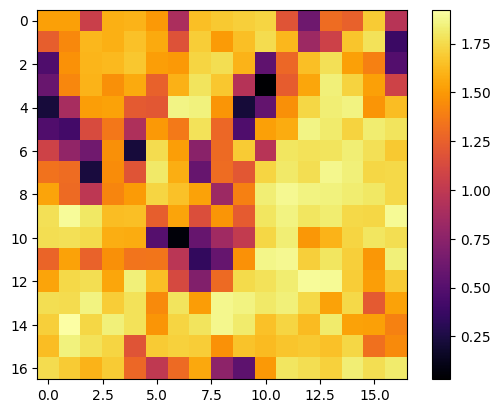

In [14]:
import matplotlib.pyplot as plt
plt.imshow(data[1381], cmap='inferno', interpolation='nearest')
plt.colorbar()

In [6]:
import pandas as pd
df = pd.read_csv('/nfs/home/vaschetti/maxarSrc/stats/Morocco-Earthquake-Sept-2023_lbl_stats.csv', index_col=0)

In [15]:
df.sort_values(by='entropy', ascending=False).head(20)

,event,mosaic,tile,num_ms_build_aoi,num_ms_build_aoi_no_water_for,num_ms_build_aoi_no_water_sjoin,parquet_build,parquet_tree,bg_pxl,road_pxl,tree_pxl,build_pxl,entropy
1381,Morocco-Earthquake-Sept-2023,104001006975B600,120202010032.tif,17340,17340,17340,18679,27143,0.558470,0.135434,0.071510,0.234586,1.622858
1095,Morocco-Earthquake-Sept-2023,104001004D86FB00,120202010032.tif,17340,17340,17340,18229,21224,0.568137,0.138277,0.061136,0.232450,1.593915
1701,Morocco-Earthquake-Sept-2023,10400100846B5A00,120202010032.tif,17340,17340,17340,20213,19712,0.582237,0.134600,0.060223,0.222941,1.570606
2276,Morocco-Earthquake-Sept-2023,1050010031762F00,120202010032.tif,17340,17340,17340,17503,13002,0.580322,0.134066,0.057463,0.228150,1.567472
229,Morocco-Earthquake-Sept-2023,10300100B53F9800,120202010032.tif,17340,17340,17340,16118,10458,0.573400,0.142471,0.048744,0.235386,1.564294
2246,Morocco-Earthquake-Sept-2023,105001002FC38300,120202010032.tif,16835,16701,16701,15626,10966,0.604432,0.128286,0.059756,0.207526,1.532779
1677,Morocco-Earthquake-Sept-2023,1040010084646C00,120202010032.tif,16053,15943,15943,16168,16060,0.603719,0.132477,0.054022,0.209782,1.525961
201,Morocco-Earthquake-Sept-2023,10300100B33D1000,120202010032.tif,17340,17340,17340,19239,8685,0.608462,0.137089,0.041562,0.212886,1.494973
2203,Morocco-Earthquake-Sept-2023,1040050046DBE400,120202010032.tif,14848,14734,14734,16985,18393,0.639775,0.116619,0.052188,0.191419,1.452681
2227,Morocco-Earthquake-Sept-2023,104005004ADBF200,120202010032.tif,15097,15064,15064,14238,8189,0.641195,0.130828,0.039045,0.188931,1.431880


In [3]:
import geopandas as gpd
import os
import pandas as pd
from tqdm import tqdm

# Directory containing the GeoJSON files
directory_path = '/nfs/home/vaschetti/maxarSrc/morocco_builds_24_05_08'
print(directory_path)
# List to hold individual GeoDataFrames
gdf_list = []

# Loop through all files in the directory
for filename in tqdm(os.listdir(directory_path)):
    if filename.endswith('.geojson'):
        file_path = os.path.join(directory_path, filename)
        # Read the GeoJSON file and append to the list
        gdf = gpd.read_file(file_path)
        gdf_list.append(gdf)

# Concatenate all GeoDataFrames into one
combined_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

# Specify the path for the output GeoPackage file
output_path = 'combined_Morocco_builds_24_05_08.gpkg'

# Save the combined GeoDataFrame as a GeoPackage
combined_gdf.to_file(output_path, driver='GPKG')

/nfs/home/vaschetti/maxarSrc/morocco_builds_24_05_08


100%|██████████| 98/98 [07:26<00:00,  4.55s/it]


In [1]:
import argparse
import torch
from pathlib import Path
import os
import geopandas as gpd
from maxarseg.assemble import delimiters, names

os.chdir('/nfs/home/vaschetti/maxarSrc')

from maxarseg.assemble import names
from maxarseg.assemble import holders
from maxarseg.configs import Config
from maxarseg.samplers import samplers_utils
import math
import numpy as np

In [4]:
all_mosaics_names = list(np.arange(43))

In [5]:
for mos_partition in range (10):
    mos_ix_s = math.floor(len(all_mosaics_names)/10) * mos_partition
    if mos_partition == 9:
        mos_ix_e = len(all_mosaics_names)
    else:
        mos_ix_e = math.floor(len(all_mosaics_names)/10) * (mos_partition + 1)
        
    mos_names = all_mosaics_names[mos_ix_s:mos_ix_e]
    print(mos_names)

[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10, 11]
[12, 13, 14, 15]
[16, 17, 18, 19]
[20, 21, 22, 23]
[24, 25, 26, 27]
[28, 29, 30, 31]
[32, 33, 34, 35]
[36, 37, 38, 39, 40, 41, 42]


In [2]:
class Event_light:
    def __init__(self,
                name,
                maxar_root = '/nfs/projects/overwatch/maxar-segmentation/maxar-open-data',
                maxar_metadata_path = './metadata/from_github_maxar_metadata/datasets',
                region = 'infer'):

        #Paths
        self.maxar_root = Path(maxar_root)
        self.buildings_ds_links_path = Path('./metadata/buildings_dataset_links.csv')
        self.maxar_metadata_path = Path(maxar_metadata_path)
        
        #Event
        self.name = name
        self.when = 'pre'
        self.region_name = names.get_region_name(self.name) if region == 'infer' else region
        self.bbox = delimiters.get_event_bbox(self.name, extra_mt=1000) #TODO può essere ottimizzata sfruttando i mosaici
        self.all_mosaics_names = names.get_mosaics_names(self.name, self.maxar_root, self.when)
        
        self.wlb_gdf = gpd.read_file('./metadata/eventi_confini_complete.gpkg')
        self.filtered_wlb_gdf = self.wlb_gdf[self.wlb_gdf['event names'] == self.name]
        if self.filtered_wlb_gdf.iloc[0].geometry is None:
            print('Evento interamente su terra')
            self.cross_wlb = False
            self.filtered_wlb_gdf = None
        else:
            print('Evento su bordo')
            self.cross_wlb = True

        print(f'Creating event: {self.name}\nRegion: {self.region_name}\nMosaics: {self.all_mosaics_names}')
        #Roads
        self.road_gdf = None

        #Mosaics
        self.mosaics = {}

        #Init mosaics
        for m_name in self.all_mosaics_names:
            self.mosaics[m_name] = holders.Mosaic(m_name, self)
        
        self.total_tiles = sum([mosaic.tiles_num for mosaic in self.mosaics.values()])
        
    def __str__(self) -> str:
        res = f'\n_______________________________________________________\nEvent: {self.name}\nMosaics: {self.all_mosaics_names}\nTotal tiles: {self.total_tiles}\n_______________________________________________________\n'
        return res

In [3]:
event = Event_light(names.get_all_events()[4])

Evento su bordo
Creating event: Hurricane-Ian-9-26-2022
Region: USA
Mosaics: ['105001002D0A8100', '10300100CCC6CD00', '105001002A491800', '10300100CCA6AB00', '10300100CE603100', '1040010074CCEA00', '10300100D8A7A100', '10200100CA0ED900', '10300100D8235300', '104001007D777200', '1040010076599E00', '10300100D93A5E00', '105001002D8BCC00', '10300100D026E700', '1050010028AE6C00', '10300100D122D300', '104001007A5E4D00', '105001002D409800', '1040010072528400', '10300100D1466F00', '10200100CA8D0500', '1040010076AFB000', '1040010074035100', '104001007BC29000', '10200100C66ACB00', '10200100C844A500', '10300100D1553D00', '105001002591D500', '105001002C9F5C00', '1040010075B43400', '10300100D6CFC000', '10200100B0214600', '10300100D0383500', '1050010029A68300', '10300100CD936D00', '1040010075302700', '10200100BC21AC00', '1040010078184300', '10200100C64F3000', '10200100C0DA0700', '105001002908EA00', '104001007A83F800', '10300100D01AC700', '10300100D0636800', '10200100B0344500', '10400100757D1800', '1

In [22]:
len(event.all_mosaics_names)

226

In [15]:
import math 
import numpy as np

mos_partition = 8
nomi = list(np.arange(64))
mos_ix_s = math.floor(len(nomi)/10) * mos_partition
if mos_partition == 9:
    mos_ix_e = len(nomi)
else:
    mos_ix_e = math.floor(len(nomi)/10) * (mos_partition + 1)
nomi[mos_ix_s:mos_ix_e]

[48, 49, 50, 51, 52, 53]

In [2]:
import os
os.chdir('/nfs/home/vaschetti/maxarSrc/')
import rasterio

In [4]:
folder_path = '/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Marshall-Fire-21-Update/pre/10200100BCB1A500'

In [6]:
def process_files(directory):
    # Iterate over all files in the given directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            print(f"Processing file: {file_path}")
            with rasterio.open(file_path) as src:
                print(src.count)
            # Add your file processing code here

# Example usage
process_files(folder_path)

Processing file: /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Marshall-Fire-21-Update/pre/10200100BCB1A500/031131113300.tif
1
Processing file: /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Marshall-Fire-21-Update/pre/10200100BCB1A500/031131113211.tif
1
Processing file: /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Marshall-Fire-21-Update/pre/10200100BCB1A500/031131113210.tif
1
Processing file: /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Marshall-Fire-21-Update/pre/10200100BCB1A500/031131113120.tif
1
Processing file: /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Marshall-Fire-21-Update/pre/10200100BCB1A500/031131113301.tif
1
Processing file: /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Marshall-Fire-21-Update/pre/10200100BCB1A500/031131113030.tif
1
Processing file: /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Marshall-Fire-21-Update/pre/10200100BCB1A500/031131113132.tif
1
Processing file: /nf

In [3]:
path = '/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Marshall-Fire-21-Update/pre/10200100BCB1A500/031131113030.tif'
with rasterio.open(path) as src:
    print(src.count)

1


In [7]:
path = '/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Kahramanmaras-turkey-earthquake-23/pre/10200100B5C3A800/031133102201.tif'
rgb_tile = '/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Kahramanmaras-turkey-earthquake-23/pre/10300100DC08C900/031133210132.tif'

In [8]:
with rasterio.open(rgb_tile) as src:
    num_bands = src.count
    
if num_bands == 1:
    print(f'Image is in black and white', )
    is_rgb = False
else:
    is_rgb = True
is_rgb

True

In [3]:
import argparse
import torch

from maxarseg.assemble import names
from maxarseg.assemble import holders
from maxarseg.configs import Config
from maxarseg.samplers import samplers_utils

In [4]:
for i, ev in enumerate(names.get_all_events()):
    print(f'{i}: {ev}')

0: BayofBengal-Cyclone-Mocha-May-23
1: Emilia-Romagna-Italy-flooding-may23
2: Gambia-flooding-8-11-2022
3: Hurricane-Fiona-9-19-2022
4: Hurricane-Ian-9-26-2022
5: Hurricane-Idalia-Florida-Aug23
6: India-Floods-Oct-2023
7: Indonesia-Earthquake22
8: Kahramanmaras-turkey-earthquake-23
9: Kalehe-DRC-Flooding-5-8-23
10: Libya-Floods-Sept-2023
11: Marshall-Fire-21-Update
12: Maui-Hawaii-fires-Aug-23
13: Morocco-Earthquake-Sept-2023
14: NWT-Canada-Aug-23
15: New-Zealand-Flooding23
16: Sudan-flooding-8-22-2022
17: afghanistan-earthquake22
18: cyclone-emnati22
19: kentucky-flooding-7-29-2022
20: pakistan-flooding22
21: shovi-georgia-landslide-8Aug23
22: southafrica-flooding22
23: tonga-volcano21
24: yellowstone-flooding22


In [3]:
from maxarseg.configs import Config
import yaml
cfg = Config('./configs/custom_cfg.yaml', './configs/default_cfg.yaml')
if not torch.cuda.is_available():
    cfg.set('models/gd/device', 'cpu')
    cfg.set('models/df/device', 'cpu')
    cfg.set('models/esam/device', 'cpu')

In [4]:
event = holders.Event(names.get_all_events()[cfg.get('event/ix')], cfg = cfg)

Evento su bordo
Creating event: BayofBengal-Cyclone-Mocha-May-23
Region: AsiaSouthEast-Full
Mosaics: ['104001008216D000', '10300110E84B5A00', '104001007EBB7C00', '1040010082988200', '10300100E6747500']


In [5]:
all_mosaics_names = event.all_mosaics_names
m0 = event.mosaics[all_mosaics_names[0]]

In [8]:
for i, pa in enumerate (m0.tiles_paths):
    print(i, pa)

0 /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/BayofBengal-Cyclone-Mocha-May-23/pre/104001008216D000/033113111131.tif
1 /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/BayofBengal-Cyclone-Mocha-May-23/pre/104001008216D000/033111333302.tif
2 /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/BayofBengal-Cyclone-Mocha-May-23/pre/104001008216D000/033113111123.tif
3 /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/BayofBengal-Cyclone-Mocha-May-23/pre/104001008216D000/033113111312.tif
4 /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/BayofBengal-Cyclone-Mocha-May-23/pre/104001008216D000/033111333321.tif
5 /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/BayofBengal-Cyclone-Mocha-May-23/pre/104001008216D000/033111333122.tif
6 /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/BayofBengal-Cyclone-Mocha-May-23/pre/104001008216D000/033111333320.tif
7 /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/BayofBengal-Cyc

In [6]:
tile_building_gdf = m0.proj_build_gdf.iloc[m0.sindex_proj_build_gdf.query(samplers_utils.path_2_tile_aoi('/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Hurricane-Idalia-Florida-Aug23/pre/1040010081581C00/031313231033.tif'))]


In [8]:
tile_building_gdf.to_file("reduced_mos_Idalia_81C00_build.gpkg", driver="GPKG")

In [23]:
m0.tiles_paths[24]

PosixPath('/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Hurricane-Idalia-Florida-Aug23/pre/1040010081581C00/031313231033.tif')

In [16]:
str_path = [str(p) for p in m0.tiles_paths]

In [22]:
[(i, s) for i, s in enumerate (str_path) if s.endswith("1033.tif")]

[(24,
  '/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Hurricane-Idalia-Florida-Aug23/pre/1040010081581C00/031313231033.tif')]

In [8]:
m0.proj_build_gdf.to_file("mos_Idalia_81C00_build.gpkg", driver="GPKG")

In [6]:
all_mosaics_names = event.all_mosaics_names
m0 = event.mosaics[all_mosaics_names[1]]
print("Selected Mosaic: ", all_mosaics_names[1])

tile_path = m0.tiles_paths[-1]
print("Selected Tile: ", tile_path)

Selected Mosaic:  1050410012C31100
Selected Tile:  /nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Emilia-Romagna-Italy-flooding-may23/pre/1050410012C31100/031111212212.tif


In [7]:
m0.set_build_gdf()


Buildings: found 3 links matching: [33303200, 333032, 3330320]


In [9]:
m0.proj_build_gdf.to_file("1233_build.gpkg", driver="GPKG")

In [15]:
proj_gdf = m0.proj_build_gdf

In [17]:
import shapely
minx, miny, maxx, maxy = 317173.68, 1481684.13, 317397.86, 1481818.29
vertices = [(minx, miny), (maxx, miny), (maxx, maxy), (minx, maxy), (minx, miny)]
query_patch_poly = shapely.geometry.Polygon(vertices)

In [18]:
gdf_index = proj_gdf.sindex

In [19]:
hits = gdf_index.query(query_patch_poly)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from maxarseg.samplers import samplers_utils
import numpy as np

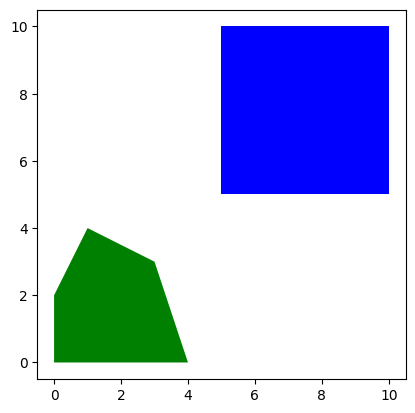

In [9]:
# Create two polygons
polygon1 = shapely.geometry.Polygon([(5, 5), (10, 5), (10, 10), (5, 10)])
polygon2 = shapely.geometry.Polygon([(0, 0), (4, 0), (3, 3), (1,4), (0, 2)])

polygon3= shapely.geometry.Polygon([(0, 8), (0, 11), (11, 11), (10, 0)])
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': [polygon1,polygon2]}, crs="EPSG:4326")

# Plot the GeoDataFrame
gdf.plot(color=["blue", "green", 'yellow'])
plt.show()


In [7]:
gdf.sindex.query(polygon3)

array([1, 0])

In [16]:
intersec_geom = gdf.intersection(polygon3)

In [17]:
valid_gdf = intersec_geom[~intersec_geom.is_empty]
num_boxes4img = [len(valid_gdf)]

<Axes: >

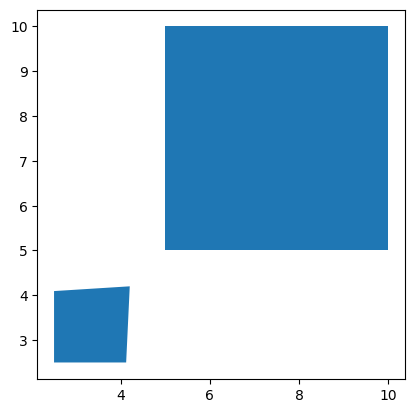

In [20]:
valid_gdf.plot()

In [18]:
if len(valid_gdf) > 0:
    boxes = samplers_utils.rel_bbox_coords(geodf = valid_gdf,
                                            ref_coords = polygon3.bounds,
                                            res = 1,
                                            ext_mt = 0)
else:
    boxes = np.empty((0,4))

In [19]:
boxes

[[2.5, 1.0, 7.5, 6.0], [0.0, 6.8, 1.7000000000000002, 8.5]]

In [34]:
hits = gdf.sindex.query(polygon3)

In [35]:
gdf.iloc[hits]

,geometry
1,"POLYGON ((0.00000 0.00000, 4.00000 0.00000, 2...."
0,"POLYGON ((5.00000 5.00000, 10.00000 5.00000, 1..."


In [7]:
import argparse

# Create the parser and add arguments
parser = argparse.ArgumentParser(description='Segment Maxar Tiles')
parser.add_argument('--batch-size', type=int, help='Batch size for processing')
parser.add_argument('--device', type=str, help='Device to use for computation')

# Define the arguments list as you would pass them in the command line
args_list = ['--batch-size', '32', '--device', 'cuda']

# Parse the arguments from the list
args = parser.parse_args(args_list)

# Now args contains the arguments
print(args.batch_size)  # Output: 32
print(args.device)      # Output: 'cuda'

32
cuda


In [8]:
for arg in vars(args):
    print(f"{arg}: {getattr(args, arg)}")


batch_size: 32
device: cuda


In [4]:
import argparse
parser = argparse.ArgumentParser(description='Segment Maxar Tiles')
args = parser.parse_args()

usage: ipykernel_launcher.py [-h]
ipykernel_launcher.py: error: unrecognized arguments: --f=/nfs/home/vaschetti/.local/share/jupyter/runtime/kernel-v2-1775473AqqbHxL4H1Ol.json


SystemExit: 2

/nfs/home/vaschetti/maxarSrc/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
import numpy as np
import time

# Create large arrays for testing
canvas = np.random.rand(2, 1700, 1700)  # 2 rows, 1 million columns each
weights = np.random.rand(1700, 1700)    # 1 million elements

In [19]:
# Method 1: Process each index separately
start_time = time.time()
canvas_0 = np.divide(canvas[0], weights, out=np.zeros_like(canvas[0]), where=weights!=0)
canvas_1 = np.divide(canvas[1], weights, out=np.zeros_like(canvas[1]), where=weights!=0)
canvas_separate = np.stack((canvas_0, canvas_1), axis = 0)
end_time = time.time()
time_individual = end_time - start_time
print("Time taken by individual processing: {:.6f} seconds".format(time_individual))

Time taken by individual processing: 0.601446 seconds


In [20]:
# Method 2: Vectorized approach
start_time = time.time()
canvas_optimized = np.divide(canvas, weights, out=np.zeros_like(canvas), where=weights!=0)
end_time = time.time()
time_vectorized = end_time - start_time
print("Time taken by vectorized processing: {:.6f} seconds".format(time_vectorized))

Time taken by vectorized processing: 1.761179 seconds


In [21]:
# Check if the results are the same
print("Results are the same:", np.array_equal(canvas_optimized, canvas_separate))

Results are the same: True


In [12]:
import glob
import rasterio
from pathlib import Path
import os
import reverse_geocoder as rg
import pyproj
import geopandas as gpd
import sys

import argparse
import torch

from maxarseg.assemble import names
from maxarseg.assemble import holders
from maxarseg.configs import Config

In [7]:
from maxarseg.assemble import holders

In [18]:
cfg = Config(config_path = '/nfs/home/vaschetti/maxarSrc/configs/trees_cfg.yaml')
if not torch.cuda.is_available():
    cfg.set('models/gd/device', 'cpu')
    cfg.set('models/df/device', 'cpu')
    cfg.set('models/esam/device', 'cpu')

In [19]:
evento = holders.Event(names.get_all_events()[0], cfg = cfg)

Evento su bordo
Creating event: BayofBengal-Cyclone-Mocha-May-23
Region: AsiaSouthEast-Full
Mosaics: ['104001008216D000', '10300110E84B5A00', '104001007EBB7C00', '1040010082988200', '10300100E6747500']


In [22]:
m = evento.mosaics['10300110E84B5A00']

In [23]:
build_gdf = m.set_build_gdf()


Buildings: found 9 links matching: [132200102, 132200120, 132200013, 132200031, 13220012, 1322000, 13220003, 13220010, 1322001, 13220001]


In [27]:
m.proj_build_gdf.to_file("10300110E84B5A00_build.gpkg", driver="GPKG")

In [5]:
from maxarseg.assemble import names
names.get_all_events()

['BayofBengal-Cyclone-Mocha-May-23',
 'Emilia-Romagna-Italy-flooding-may23',
 'Gambia-flooding-8-11-2022',
 'Hurricane-Fiona-9-19-2022',
 'Hurricane-Ian-9-26-2022',
 'Hurricane-Idalia-Florida-Aug23',
 'India-Floods-Oct-2023',
 'Indonesia-Earthquake22',
 'Kahramanmaras-turkey-earthquake-23',
 'Kalehe-DRC-Flooding-5-8-23',
 'Libya-Floods-Sept-2023',
 'Marshall-Fire-21-Update',
 'Maui-Hawaii-fires-Aug-23',
 'Morocco-Earthquake-Sept-2023',
 'NWT-Canada-Aug-23',
 'New-Zealand-Flooding23',
 'Sudan-flooding-8-22-2022',
 'afghanistan-earthquake22',
 'cyclone-emnati22',
 'kentucky-flooding-7-29-2022',
 'pakistan-flooding22',
 'shovi-georgia-landslide-8Aug23',
 'southafrica-flooding22',
 'tonga-volcano21',
 'yellowstone-flooding22']

In [4]:
bs = 2
config = build.SegmentConfig(batch_size = bs, device='cuda')

/home/vaschetti/.pyenv/versions/3.10.13/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
- GD model device: cuda:0
- Efficient SAM device: cuda:0


In [5]:
evento = build.Event(events_names[7], seg_config = config, when='pre')
print(evento.region_name)
all_mosaics_names = evento.all_mosaics_names
print(all_mosaics_names)
m0 = evento.mosaics[all_mosaics_names[0]]
print(f'Number of tiles: {m0.tiles_num}')

AfricaWest-Full
['10300100CFC9A500', '105001002BD68F00', '1040010073D77D00']
Number of tiles: 18


In [6]:
m0.set_build_gdf()

Found 3 links matching: [33303200, 333032, 3330320]


In [7]:
m0.proj_road_gdf

In [8]:
m0.tiles_paths[0]

PosixPath('/nfs/projects/overwatch/maxar-segmentation/maxar-open-data/Gambia-flooding-8-11-2022/pre/10300100CFC9A500/033133031231.tif')

In [9]:
m0.set_road_gdf()

not USA:  AfricaWest-Full.tsv


In [14]:
road_mask = m0.get_tile_road_mask_np(m0.tiles_paths[0])

array([0, 1], dtype=uint8)

In [16]:
import rasterio
from rasterio.windows import Window
from maxarseg import geoDatasets
from maxarseg import samplers
from maxarseg import segment
from torch.utils.data import DataLoader
from torchgeo.datasets import stack_samples, unbind_samples
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from maxarseg import samplers_utils
import torch
from time import time

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [17]:
def segment_tile(self, tile_path):
    seg_config = self.event.seg_config

    dataset = geoDatasets.Maxar(str(tile_path))
    sampler = samplers.MyBatchGridGeoSampler(dataset, batch_size=seg_config.batch_size, size=seg_config.size, stride=seg_config.stride)
    dataloader = DataLoader(dataset , batch_sampler=sampler, collate_fn=stack_samples)

    canvas = np.zeros((seg_config.size, seg_config.size, 3), dtype=np.uint8)

    i = 0
    start_time_all = time()
    for batch in tqdm(dataloader):
        if i == 5:
            break
        if i != 4:
            i+=1
            continue
        original_img_tsr = batch['image']
        img_b = batch['image'].permute(0,2,3,1).numpy().astype('uint8') #TODO: l'immagine viene convertita in numpy ma magari è meglio lasciarla in tensor

        #trees
        GD_t_0 = time()
        tree_boxes_b, num_trees4img = segment.get_GD_boxes(img_b, seg_config.GD_model,
                                            seg_config.TEXT_PROMPT,
                                            seg_config.BOX_TRESHOLD,
                                            seg_config.TEXT_TRESHOLD,
                                            dataset.res,
                                            device = seg_config.device,
                                            max_area_mt2 = seg_config.max_area_GD_boxes_mt2)
        print('GD_time: ', time() - GD_t_0)
        print('- GD model device:', next(seg_config.GD_model.parameters()).device)
        
        #building            
        print(batch['bbox'])            
        building_boxes_b, num_build4img = segment.get_batch_buildings_boxes(batch['bbox'],
                                                                    proj_buildings_gdf = self.proj_build_gdf,
                                                                    dataset_res = dataset.res,
                                                                    ext_mt = 10)
        max_detect = max(num_trees4img + num_build4img)
        print(f'max_detect: {max_detect}')
        input_points, input_labels = build.get_input_pts_and_lbs(tree_boxes_b, building_boxes_b, max_detect)
        
        #boxes4FSam = build.get_boxes4FSam(tree_boxes_b, building_boxes_b, max_detect)
        #print('tree_b shape: ', building_boxes_b[0].shape)
        #print('input_points shape: ', input_points.shape)
        #print('input_labels shape: ', input_labels.shape)

        all_masks_b = segment.ESAM_from_inputs(original_img_tsr,
                                                torch.from_numpy(input_points),
                                                torch.from_numpy(input_labels),
                                                efficient_sam = seg_config.efficient_sam,
                                                device = seg_config.device,
                                                num_parall_queries = 17)
        
        tree_mask_b, building_mask_b, pad_mask_b = segment.discern(all_masks_b, num_trees4img, num_build4img)

        #roads
        """get_road_masks_b(batch['bbox'],
                         self.proj_road_gdf,
                         seg_config.size,
                         dataset.res,
                         ext_mt = 10)"""
        
        #road_mask_b = segment.get_road_mask(img_b,)
        i += 1
    print(f'\nTotal Time for {seg_config.batch_size * i} images: ', time() - start_time_all)
    return img_b, original_img_tsr#, tree_boxes_b, building_boxes_b, all_masks_b, tree_mask_b, building_mask_b, pad_mask_b

_, _ = segment_tile(m0, m0.tiles_paths[17])
#img_b, original_img, tree_boxes_b, building_boxes_b, all_masks_b, tree_mask_b, building_mask_b, pad_mask_b = segment_tile(m0, m0.tiles_paths[17])

  0%|          | 0/1682 [00:00<?, ?it/s]

  0%|          | 2/1682 [00:00<01:35, 17.58it/s]

In sampler
tile_polygon:  POLYGON ((315427.24609375 1485156.25, 320156.25 1485156.25, 320156.25 1479843.75, 315394.8974609375 1479843.75, 315427.24609375 1485156.25))


  0%|          | 4/1682 [00:04<33:06,  1.18s/it]

GD_time:  4.442540645599365
- GD model device: cuda:0
[BoundingBox(minx=316033.935546875, maxx=316217.041015625, miny=1479843.75, maxy=1480026.85546875, mint=0.0, maxt=9.223372036854776e+18), BoundingBox(minx=316125.48828125, maxx=316308.59375, miny=1479843.75, maxy=1480026.85546875, mint=0.0, maxt=9.223372036854776e+18)]
max_detect: 83
-1


ValueError: index can't contain negative values

In [ ]:
m0.segment_tile()